<a href="https://colab.research.google.com/github/mmmhdp/nn_labs/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [187]:
import torch as tr
import pandas as pd
import numpy as np
import scipy as scp
import datetime as dt

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import pyplot as plt
import seaborn as sns

# eda

In [188]:
train_dt = pd.read_csv('/content/drive/MyDrive/colab_notebooks/train.csv')
test_dt = pd.read_csv('/content/drive/MyDrive/colab_notebooks/test.csv')

In [189]:
(train_dt.isna().sum()!=0).all()

False

In [190]:
train_dt.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000
mean,4.113874,87.534919,73.000381,71.308789,58.599393,1.165500,1.063972,115.443468,33.228642,44.320187,...,3.151430,3.055206,3.054358,1.295344,1.052631,2.042034,1.482988,0.839731,0.673590,34.502993
std,1.437846,29.786319,33.730910,31.166777,36.902657,0.364607,0.401877,54.614167,27.104426,19.993413,...,1.192035,1.045869,1.175579,0.393231,0.380725,1.244305,0.980906,0.485728,0.454975,34.334793
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.383174,52.078254,58.001648,35.228269,0.966676,0.777721,78.353150,16.790394,32.890369,...,2.117647,2.245649,2.091629,1.060857,0.779166,1.000000,0.920000,0.451754,0.307467,5.330000
50%,4.000000,84.841880,60.547264,66.361592,39.821155,1.199541,1.148646,122.906070,26.585389,45.123500,...,2.605455,2.615321,2.429201,1.368922,1.168512,2.000000,1.062857,0.800000,0.500000,20.000000
75%,5.000000,100.404410,85.982586,78.116681,73.075297,1.444537,1.359836,154.119320,38.193007,58.973428,...,4.019566,3.722419,3.914868,1.589027,1.331531,3.000000,1.912000,1.200000,1.020735,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


<Axes: >

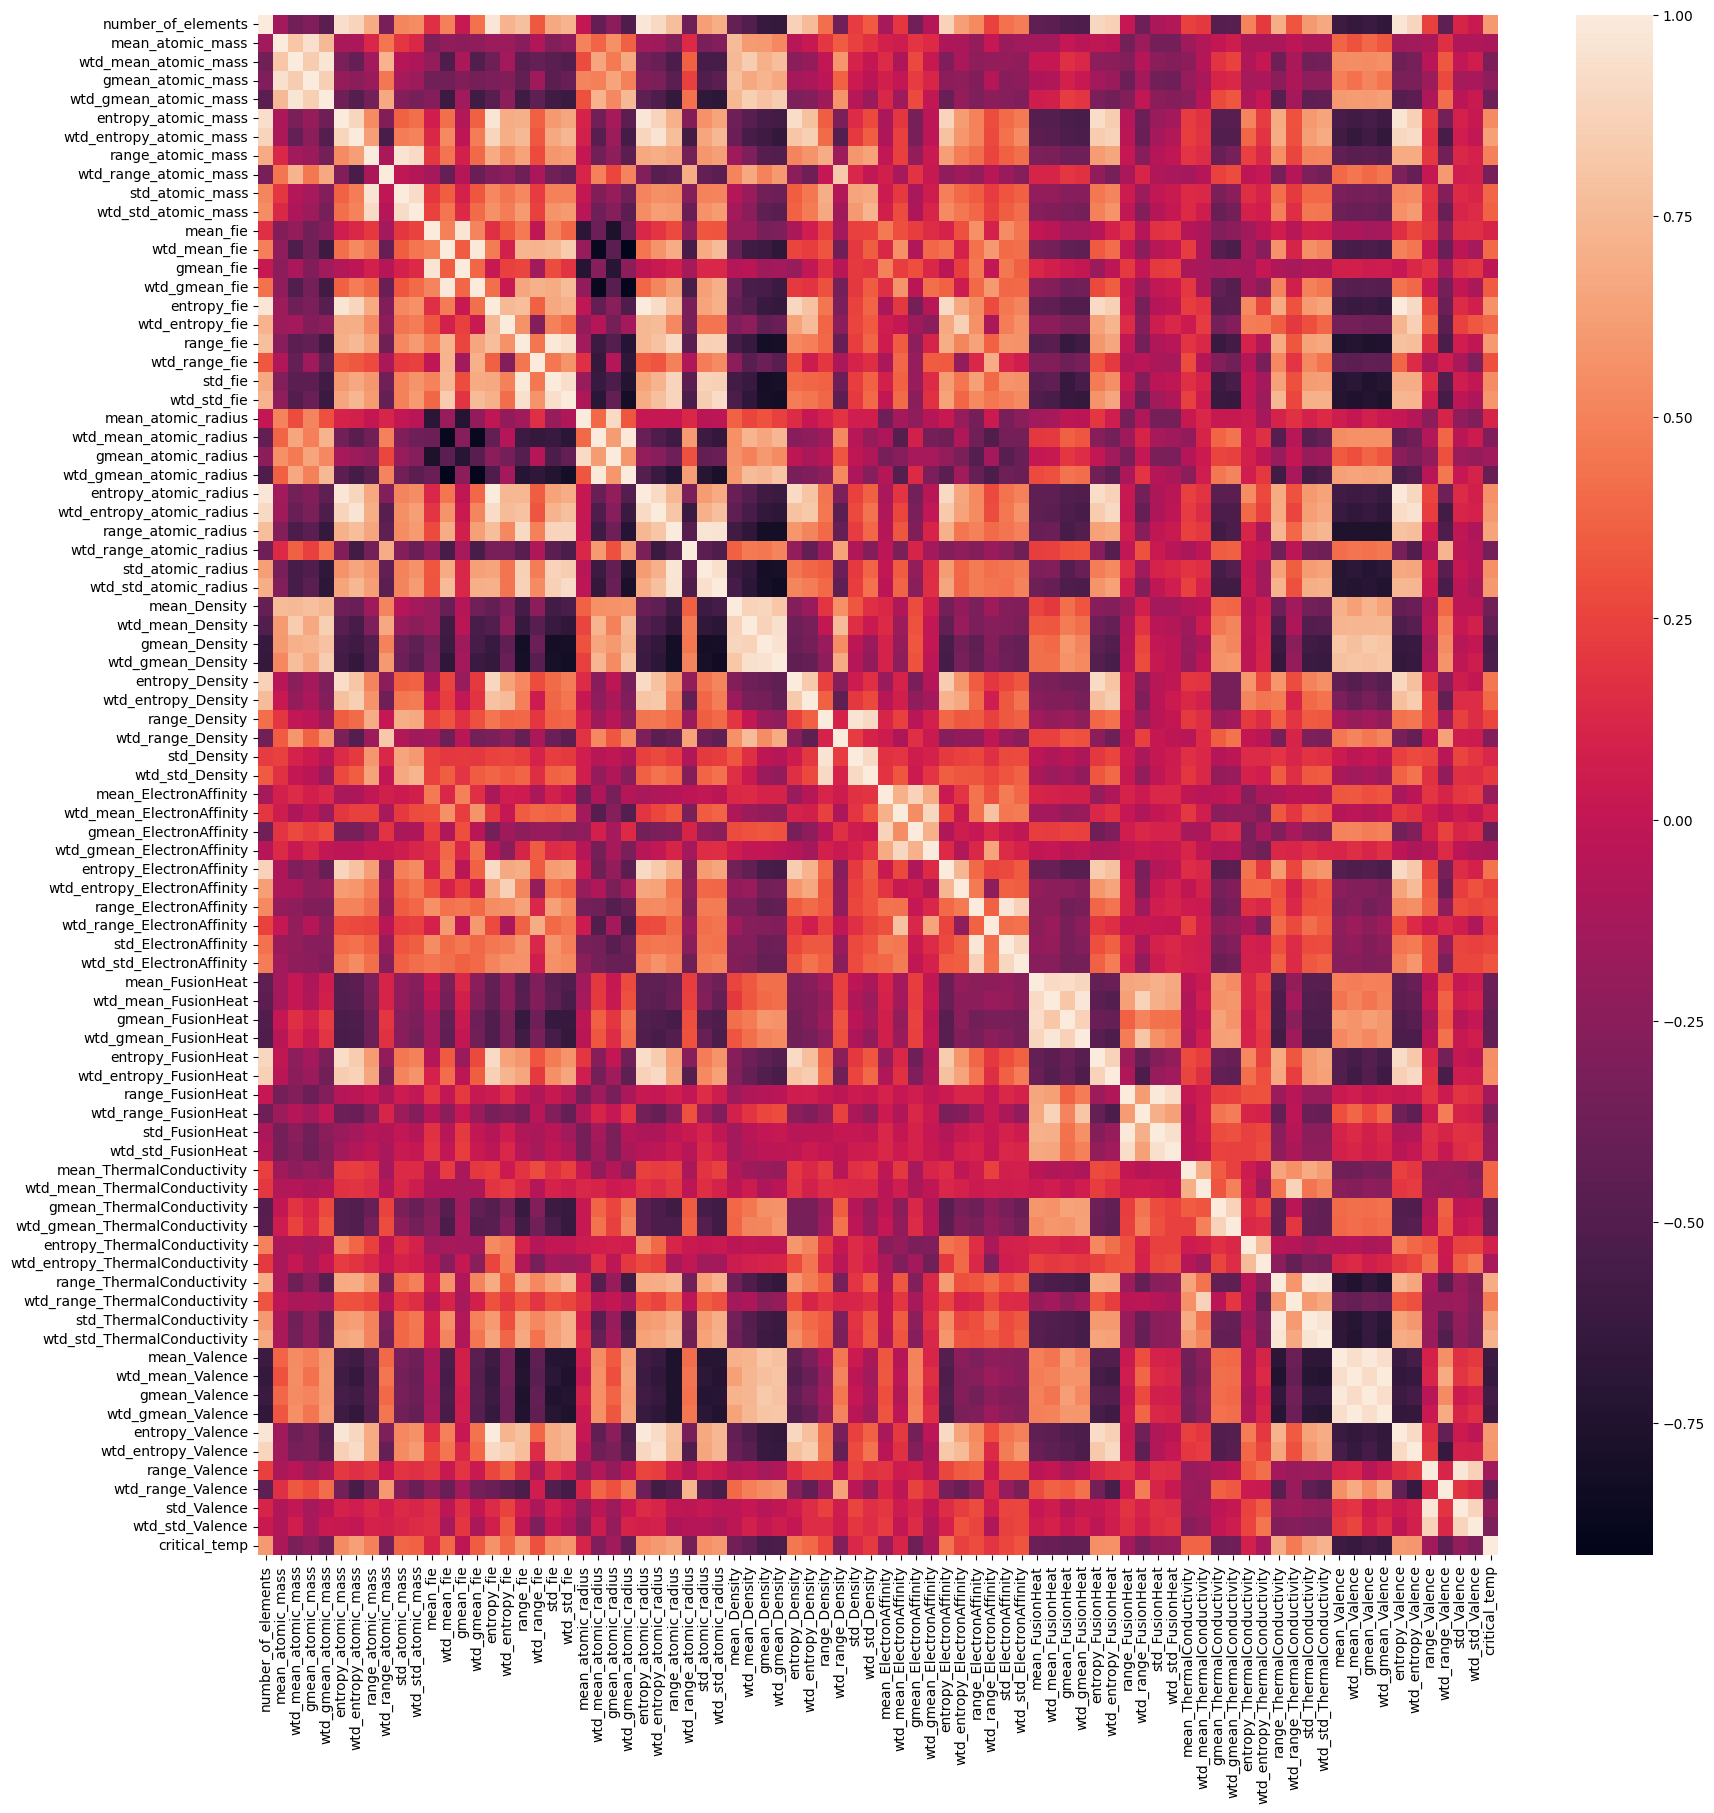

In [191]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(train_dt.corr())

In [192]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               17010 non-null  int64  
 1   mean_atomic_mass                 17010 non-null  float64
 2   wtd_mean_atomic_mass             17010 non-null  float64
 3   gmean_atomic_mass                17010 non-null  float64
 4   wtd_gmean_atomic_mass            17010 non-null  float64
 5   entropy_atomic_mass              17010 non-null  float64
 6   wtd_entropy_atomic_mass          17010 non-null  float64
 7   range_atomic_mass                17010 non-null  float64
 8   wtd_range_atomic_mass            17010 non-null  float64
 9   std_atomic_mass                  17010 non-null  float64
 10  wtd_std_atomic_mass              17010 non-null  float64
 11  mean_fie                         17010 non-null  float64
 12  wtd_mean_fie      

# model stuff

In [193]:
class ChemDataTransform():
    def __init__(self):
        self.MNscaler = preprocessing.MinMaxScaler()

    def fit_transform(self, data:pd.DataFrame):

        data["range_Valence"].astype(float)
        data["range_atomic_radius"].astype(float)
        data["number_of_elements"].astype(float)
        # data = pd.DataFrame(self.MNscaler.fit_transform(data), columns = data.columns)

        return data

    def transform(self, data:pd.DataFrame):

        data["range_Valence"].astype(float)
        data["range_atomic_radius"].astype(float)
        data["number_of_elements"].astype(float)
        # data = pd.DataFrame(self.MNscaler.fit_transform(data), columns = data.columns)

        return data

In [194]:
class ChemTrainDataCont(Dataset):
    def __init__(self, X, y):
        self.X = tr.FloatTensor(X.to_numpy())
        self.y = tr.FloatTensor(y.to_numpy())


    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, ind):
        return (self.X[ind], self.y[ind])


class ChemValidationDataCont(Dataset):

    def __init__(self, X):
        self.X = tr.FloatTensor(X.to_numpy())

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, ind):
        return self.X[ind]

In [195]:
class DataPreprocessor():
    def __init__(self, train_data_path, validation_data_path, target_column_name ,
                 transformer = ChemDataTransform,
                 train_data_cont = ChemTrainDataCont,
                 validation_data_cont = ChemValidationDataCont):
        self.transformer = transformer()
        self.target_column_name = target_column_name
        self.train_data_path = train_data_path
        self.validation_data_path = validation_data_path
        self.train_data_cont = train_data_cont
        self.validation_data_cont = validation_data_cont

        self.train_data = self.__preprocess_train_data()
        self.validation_data = self.__preprocess_validation_data()

        self.__splitted_train_data = self.__get_splitted_train_data()

    def get_preprocess_data(self, is_test=False):
        return self.validation_data if is_test else self.train_data

    def __get_splitted_train_data(self):
        features = self.train_data.drop(columns=[self.target_column_name])
        target = self.train_data[self.target_column_name]
        tra_fts, tes_fts, tra_targ, tes_targ =  train_test_split(features, target,
                                train_size=0.75,
                                shuffle=True,
                                random_state=42)
        return tra_fts, tes_fts, tra_targ, tes_targ

    def get_train_data_cont(self):
        train_features, _ , train_target, _ = self.__splitted_train_data
        train_cont = self.train_data_cont(train_features, train_target)
        return train_cont

    def get_test_data_cont(self):
        _ , test_features , _ , test_target = self.__splitted_train_data
        train_cont = self.train_data_cont(test_features, test_target)
        return train_cont

    def get_validation_data_cont(self):
        return self.validation_data_cont(self.validation_data)

    def __preprocess_train_data(self):
        raw_train_data = pd.read_csv(self.train_data_path)
        train_data = self.transformer.fit_transform(raw_train_data)
        return train_data

    def __preprocess_validation_data(self):
        raw_test_data = pd.read_csv(self.validation_data_path)
        test_data = self.transformer.transform(raw_test_data)
        return test_data

In [196]:
class ChemRegNn(nn.Module):
    def __init__(self, num_of_entry_neurs, num_of_inner_layers_neurs):
        super().__init__()
        self.entry = tr.nn.Linear(num_of_entry_neurs, num_of_inner_layers_neurs)
        self.act_1 = tr.nn.functional.sigmoid
        self.act_2 = tr.nn.functional.relu
        self.act = tr.nn.functional.tanh

        self.drop =m = nn.Dropout(p=0.2)

        self.inner_1 = tr.nn.Linear(num_of_inner_layers_neurs, num_of_inner_layers_neurs//2)

        self.inner_2 = tr.nn.Linear(num_of_inner_layers_neurs//2, num_of_inner_layers_neurs//4)

        self.inner_3 = tr.nn.Linear(num_of_inner_layers_neurs//4, num_of_inner_layers_neurs//8)

        self.output = tr.nn.Linear(num_of_inner_layers_neurs//8, 1)

    def forward(self, features):
        features = self.entry(features)
        features = self.act(features)
        features = self.drop(features)

        features = self.inner_1(features)
        features = self.act(features)
        features = self.drop(features)


        features = self.inner_2(features)
        features = self.act_1(features)
        features = self.drop(features)


        features = self.inner_3(features)
        features = self.act_2(features)
        features = self.drop(features)


        features = self.output(features)
        return features

net = ChemRegNn(10,10)
print(net)

ChemRegNn(
  (entry): Linear(in_features=10, out_features=10, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (inner_1): Linear(in_features=10, out_features=5, bias=True)
  (inner_2): Linear(in_features=5, out_features=2, bias=True)
  (inner_3): Linear(in_features=2, out_features=1, bias=True)
  (output): Linear(in_features=1, out_features=1, bias=True)
)


In [197]:
class ChemNnRegressor():
    def __init__(self,
                 dataset, network, loss_f,
                 device,
                 optimizer,
                 scheduler,
                 permutate,
                 learning_rate,
                 epoch_amount,
                 batch_size,
                 max_batches_per_epoch,
                 early_stopping
                 ):
        self.dataset = dataset

        self.init_model = network
        self.best_model = network

        self.loss_f = loss_f
        self.device = device
        self.optimizer = optimizer
        self.scheduler = scheduler

        self.permutate = permutate
        self.learning_rate = learning_rate
        self.epoch_amount = epoch_amount

        self.batch_size = batch_size
        self.max_batches_per_epoch = max_batches_per_epoch
        self.early_stopping = early_stopping


    def predict(self, features):
        return self.best_model(features)


    def fit(self, train_dataset):

        network = self.init_model
        device = tr.device(self.device)

        network = network.to(device)

        opt = self.optimizer
        sch = self.scheduler

        loaded_data = DataLoader(train_dataset, batch_size = self.batch_size, shuffle = self.permutate)

        best_val_loss = float("inf")
        best_epoch = 0

        network.train()

        for epoch in range(self.epoch_amount):

            mean_loss, batch_time = self.__epoch(network, loaded_data, opt, sch, device)

            best_val_loss = min(mean_loss, best_val_loss)
            best_epoch = epoch if mean_loss == best_val_loss else best_epoch
            self.best_model = network if best_epoch == epoch else self.best_model

            print(f"epoch : {epoch} mean_loss: {mean_loss} batch_time: {batch_time}")

        network.eval()


    def __epoch(self, network, loaded_data, opt, sch, device):
        start_time_stamp = dt.datetime.now()

        n_batches = 0
        mean_loss_per_batch = 0

        for features_batch, target_batch in loaded_data:

            opt.zero_grad()

            features_batch = features_batch.to(device)
            target_batch = target_batch.to(device)

            pred_target = network(features_batch)
            loss = self.loss_f(pred_target, target_batch)
            loss.backward()
            opt.step()

            mean_loss_per_batch+=loss
            n_batches+=1

            sch.step(loss)

        mean_loss_per_batch = float(mean_loss_per_batch)
        mean_loss = mean_loss_per_batch/n_batches

        finish_time_stamp = dt.datetime.now()
        batch_time = finish_time_stamp - start_time_stamp

        return mean_loss, batch_time

def staff():
    dpr_params = {
        "train_data_path" : "/content/drive/MyDrive/colab_notebooks/train.csv",
        "validation_data_path" : "/content/drive/MyDrive/colab_notebooks/test.csv",
        "target_column_name" : "critical_temp",
        "transformer" : ChemDataTransform,
        "train_data_cont" : ChemTrainDataCont,
        "validation_data_cont" : ChemValidationDataCont
        }
    dpr = DataPreprocessor(**dpr_params)

    network_params = {
        "num_of_entry_neurs" : 81,
        "num_of_inner_layers_neurs" : 512
    }
    network = ChemRegNn(**network_params)

    optimizer = tr.optim.SGD(network.parameters(), lr=0.1, momentum=0.9)
    scheduler = tr.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

    regr_params = {
       "dataset": dpr.get_train_data_cont(),
       "network": network,
       "loss_f": nn.MSELoss(),
       "device" : 'cpu',
       "optimizer" : optimizer,
       "scheduler" : scheduler,
       "permutate" : True,
       "learning_rate" : 1e-3,
       "epoch_amount" : 300,
       "batch_size" : 50,
       "max_batches_per_epoch" : None,
       "early_stopping" : 20
    }
    regr = ChemNnRegressor(**regr_params)
    return dpr, network, regr

dpr, network, regr = staff()
dpr, network, regr

train_data = dpr.get_train_data_cont()
train_data.X, train_data.y

regr.fit(train_data)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch : 0 mean_loss: 2805.15380859375 batch_time: 0:00:00.991125
epoch : 1 mean_loss: 1344.4932861328125 batch_time: 0:00:00.994335
epoch : 2 mean_loss: 1344.9796142578125 batch_time: 0:00:01.020528
epoch : 3 mean_loss: 1346.8834228515625 batch_time: 0:00:01.555821
epoch : 4 mean_loss: 1344.9969482421875 batch_time: 0:00:02.394535
epoch : 5 mean_loss: 1345.055419921875 batch_time: 0:00:02.096593
epoch : 6 mean_loss: 1346.562255859375 batch_time: 0:00:01.750269
epoch : 7 mean_loss: 1347.14453125 batch_time: 0:00:01.713194
epoch : 8 mean_loss: 1344.54443359375 batch_time: 0:00:01.748575
epoch : 9 mean_loss: 1343.4346923828125 batch_time: 0:00:01.780495
epoch : 10 mean_loss: 1345.66064453125 batch_time: 0:00:01.764215
epoch : 11 mean_loss: 1345.078369140625 batch_time: 0:00:02.412078
epoch : 12 mean_loss: 1345.8724365234375 batch_time: 0:00:02.141276
epoch : 13 mean_loss: 1344.3319091796875 batch_time: 0:00:01.747192
epoch : 14 mean_loss: 1344.1754150390625 batch_time: 0:00:01.779581
epoc

KeyboardInterrupt: 

In [198]:
test_data = dpr.get_test_data_cont()
test_data.X

tensor([[  4.0000,  76.5177,  56.8088,  ...,   1.1000,   0.4330,   0.4410],
        [  4.0000,  90.9759,  91.8217,  ...,   1.1850,   0.8292,   0.5814],
        [  5.0000,  74.2317,  51.6785,  ...,   1.0428,   0.4000,   0.2679],
        ...,
        [  2.0000, 121.2090, 121.2090,  ...,   1.5000,   1.5000,   1.5000],
        [  6.0000,  92.8552, 100.5753,  ...,   1.1100,   1.2134,   1.3106],
        [  2.0000, 141.0835, 118.5218,  ...,   2.7500,   0.5000,   0.4330]])

In [199]:
test_pred_target = regr.predict(test_data.X)
test_real_target = test_data.y

pred_target = np.array(test_pred_target.detach().cpu())
real_target = np.array(test_real_target.cpu())

mean_squared_error(real_target, pred_target), real_target.mean(), pred_target.mean()

(1326.4834, 34.04864, 47.147625)

In [200]:
validation_data = dpr.get_validation_data_cont()

pred_target = regr.predict(validation_data.X)

pred_target = np.array(pred_target.detach().cpu())

pred_target

array([[47.147625],
       [47.147625],
       [47.147625],
       ...,
       [47.147625],
       [47.147625],
       [47.147625]], dtype=float32)

In [201]:
pred_dt = pd.DataFrame(pred_target)
pred_dt

,0
0,47.147625
1,47.147625
2,47.147625
3,47.147625
4,47.147625
...,...
4248,47.147625
4249,47.147625
4250,47.147625
4251,47.147625


In [202]:
pred_dt.to_csv(path_or_buf = "output.csv",
               index_label="index",
               header = ["critical_temp"])